# Рынок заведений общественного питания Москвы

**Описание проекта:**  
Я решил открыть небольшое кафе в Москве. Оно оригинальное - гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами я решил обратиться к инвесторам. Их интересует текущее положение дел на рынке - смогу ли я снискать популярности на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
Я - гуру аналитики, и партнёры просят меня подготовить исследование рынка. У меня есть открытые данные о заведениях общественного питания в Москве.

**Цель:**  
По результатам проведенного мною исследования рынка общественного питания Москвы убедить инвесторов вложиться в мой проект робокафе.

**Основные задачи:**
1. Определить, какой вид заведения наиболее интересен для выбора первого робокафе;
2. Сколько посадочных мест необходимо для выбора оптимальной площади;
3. Где именно расположить робокафе;
4. Описать дальнейшие перспективы развития.

**Этапы работы:**
1. Загрузить и подготовить полученные данные к анализу;
2. Произвести анализ данных;
3. Сформировать общее заключение и презентацию для инвесторов.

## 1. Изучение данных и их предобработка

**Путь к файлу:**  
* `/datasets/rest_data.csv`

**Описание данных:**  
Таблица `rest_data`:
* `id` - идентификатор объекта;
* `object_name` - название объекта общественного питания;
* `chain` - сетевой ресторан;
* `object_type` - тип объекта общественного питания;
* `address` - адрес;
* `number` - количество посадочных мест.

Загрузим библиотеки и сам файл для работы:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import re # для работы с регулярными выражениями

In [2]:
# для отображения карты Москвы
!pip install folium

import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

print('Folium installed and imported!')

Folium installed and imported!


In [3]:
try:
    data = pd.read_csv('/datasets/rest_data.csv')
except:
    data = pd.read_csv(r'C:\Users\sidya\Docs\Jupiter\Datasets\rest_data.csv')

Посмотрим детально на полученные данные:

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
print(data.info())
display(data.head())
print(f'Размер датасета составляет: {data.shape}')
display(pd.DataFrame(data.isna().mean(), columns=['NaNs']).style.format('{:.2%}'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

Размер датасета составляет: (15366, 6)


*Датафрейм не содержит пропусков и некорректных типов данных.*  
*Однако есть различные трактовки названия объекта (прописными буквами, совместно с типом заведения и т.д.) и неточности адреса (нет единого стандарта). Это нужно исправить при дальнейшей обработке.*  


Приведем данные в строках к нижнему регистру:

In [6]:
for column in data.columns:
    try:
        data[column] = data[column].str.lower()
    except:
        continue

data.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

*Все значения в строках приведены к строчным значениям, теперь нужно проверить их на дубликаты.*

Проверим датафрейм на наличие дубликатов:

In [7]:
print('Количество полных дубликатов:', data.duplicated().sum())

Количество полных дубликатов: 0


In [8]:
print('Количество дубликатов строк в колонке "id":', data['id'].duplicated().sum())

Количество дубликатов строк в колонке "id": 0


In [9]:
print('Количество дубликатов строк, кроме колонки "id":', data.loc[:,'object_name':'number'].duplicated().sum())
data[data.duplicated(['object_name', 'chain', 'object_type', 'address', 'number'])].head()

Количество дубликатов строк, кроме колонки "id": 85


id                           object_name chain object_type  \
2381  28611  комбинат питания мгту им.н.э.баумана   нет    столовая   
3397  71896               буфет «коникс-школьник»   нет       буфет   
3481  20914                            буфет мади   нет       буфет   
4431  23759     столовая гбоу города москвы № 384   нет       буфет   
4537  23391    столовая «комбинат питания космос»   нет    столовая   

                                                    address  number  
2381  город москва, 2-я бауманская улица, дом 5, строение 1     100  
3397                  город москва, улица удальцова, дом 21     100  
3481           город москва, ленинградский проспект, дом 64      40  
4431                город москва, беловежская улица, дом 67     100  
4537           город москва, новозаводская улица, дом 12/11      15

In [10]:
print(f'Доля дубликатов строк, кроме колонки "id": {(data.loc[:,"object_name":"number"].duplicated().sum() / len(data)):.2%}')

Доля дубликатов строк, кроме колонки "id": 0.55%


In [11]:
print('Количество дубликатов строк, кроме "id" и "number":', data.loc[:,'object_name':'address'].duplicated().sum())
data[data.duplicated(['object_name', 'chain', 'object_type', 'address'])].head()

Количество дубликатов строк, кроме "id" и "number": 183


id                           object_name chain object_type  \
115    28614  комбинат питания мгту им.н.э.баумана   нет       буфет   
580   149205                  общественное питание   нет        кафе   
581   149131                  общественное питание   нет        кафе   
1409  151267                              альфорно   нет        кафе   
2375   28604  комбинат питания мгту им.н.э.баумана   нет    столовая   

                                                    address  number  
115            город москва, бригадирский переулок, дом 3-5      12  
580                 город москва, павелецкая площадь, дом 1      35  
581                 город москва, павелецкая площадь, дом 1      39  
1409             город москва, город зеленоград, корпус 438      45  
2375  город москва, 2-я бауманская улица, дом 5, строение 1     150

In [12]:
print(f'Доля дубликатов строк, кроме "id" и "number": {(data.loc[:,"object_name":"address"].duplicated().sum()/len(data)):.2%}')

Доля дубликатов строк, кроме "id" и "number": 1.19%


*`По результатам детального разбора слобцов обнаружилось следующее:`*  
* *Как и предполагалось, значения в  столбце "id" уникальны;*  
* *По столбцам, кроме "id", однаружено 85 полных совпадений или 0.55% от общего объема датафрейма, их можно удалить;*  
* *Если убрать еще и колонку "number", количество дубликатов возрастет до 183 или 1.19% от общего. Но мы не можем однозначно быть уверенными, во-первых, что в каждом месте (например, ТЦ) только по одному такому заведению, во-вторых, какая из строк с подлинными данными. Эти строки удалять нельзя.*

*Итого формируется впечатление, что данные брались из разных источников (напомню, у меня открытые данные) или в разное время (id не по возрастанию, а хаотично), что привело к идентичным строкам, но разным значениям id.*

Удаление обнаруженных дубликатов строк:

In [13]:
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


Проверим ключевые колонки на уникальность значений и их количество:

In [14]:
data['chain'].value_counts()

нет    12317
да      2964
Name: chain, dtype: int64

In [15]:
data['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

*`В большинстве несетевых точек питания по видам преобладают кафе.`*

Изменим некоторые названия для удобства восприятия и точности классификации:

In [16]:
data['object_type'] = np.where(data['object_type'] == 'магазин (отдел кулинарии)', 'магазин кулинарии', data['object_type'])
data['object_type'] = np.where(data['object_type'] == 'предприятие быстрого обслуживания', 'фастфуд', data['object_type'])
data['object_type'].value_counts()

кафе                 6071
столовая             2584
ресторан             2282
фастфуд              1897
бар                   855
буфет                 576
кафетерий             395
закусочная            348
магазин кулинарии     273
Name: object_type, dtype: int64

## 2. Анализ данных

### 2.1. Cоотношение видов объектов общественного питания по количеству

In [17]:
object_types = (data.pivot_table(index='object_type', values='id', aggfunc='count')
                .sort_values(by='id', ascending=False)
                .reset_index())
object_types.rename(columns={'id':'count'}, inplace=True)
object_types

object_type  count
0               кафе   6071
1           столовая   2584
2           ресторан   2282
3            фастфуд   1897
4                бар    855
5              буфет    576
6          кафетерий    395
7         закусочная    348
8  магазин кулинарии    273

In [18]:
print('Общее количество объектов общественного питания в Москве:', round(object_types['count'].sum()))

Общее количество объектов общественного питания в Москве: 15281


In [19]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=object_types['object_type'], 
                             values=object_types['count'], 
                             hole=0.5,
                             pull=[0.08, 0.06, 0.06, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04])])

fig.update_traces(
    hoverinfo='label+percent', textinfo='value', textfont_size=11.5, marker=dict(
        colors=colors, line=dict(color='#000000', width=1))
)
fig.update_layout(title_text='Количество объектов общественного питания по их видам')
fig.show()

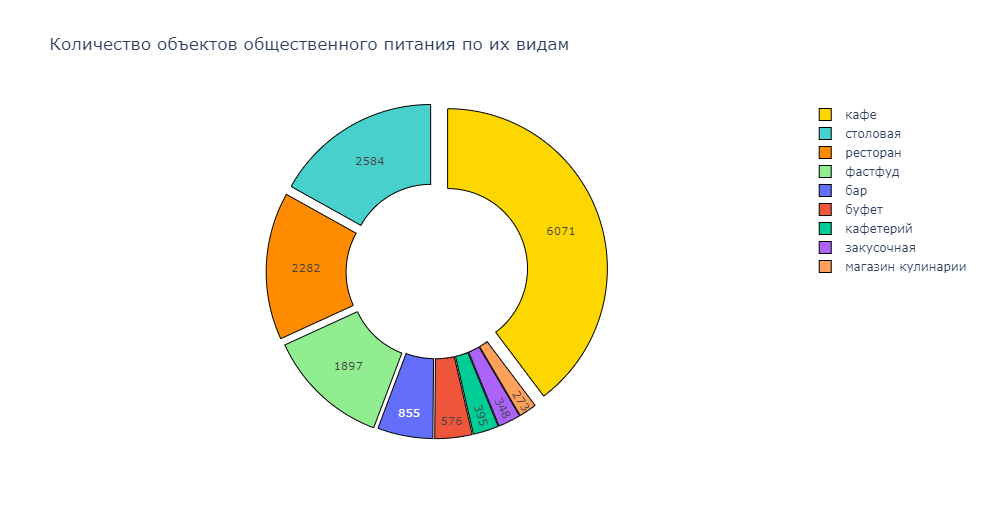

*В итоге:*  
* *Кафе составляют 39.7% от общего количества или 6071 объект в абсолютных величинах;*  
* *Второе место занимают столовые - 16.9% или 2584 объекта;*  
* *На третье место с небольшим отставанием сместились рестораны, их доля 14.9% от общего или 2282 объекта. Замыкают группу кафетерии, закусочные и магазины кулинарии, их меньше 7%.*

### 2.2. Соотношение сетевых и несетевых заведений по количеству

In [20]:
chain = data.groupby('chain').agg({'id': 'count'}).sort_values(by='id', ascending=False).reset_index()
chain.rename(columns={'id':'count'}, inplace=True)
chain

chain  count
0   нет  12317
1    да   2964

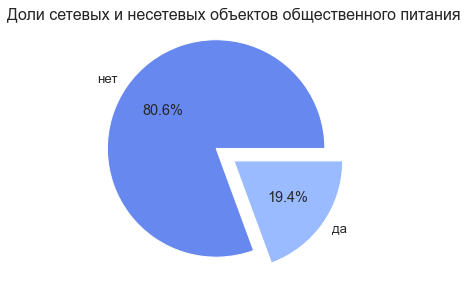

In [21]:
plt.figure(figsize=(16,5))

sns.set(font_scale=1.2)
explode = [0.2, 0]
colors = sns.color_palette('coolwarm')

plt.pie(chain['count'], labels=chain['chain'], colors=colors, autopct='%0.1f%%', explode=explode)

plt.title('Доли сетевых и несетевых объектов общественного питания', fontsize=16)
plt.show()

*`Итого:`*  
* *Преобладающая доля заведений общественного питания - несетевые точки, доля которых составляет 80.6% от общего или 12317 объектов в абсолютном выражении. Это плюс для инвесторов, так как именно сетевые точки (их 19,4%) составляют основную конкуренцию будущему бизнесу на основании популярности их имени/бренда и отличительных высоких стандартов сервиса/качества изготавливаемой продукции.*

### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?

In [22]:
chain_objects_all = (data.groupby(['object_type','chain'])
                 .agg({'id': 'count'})
                 .sort_values(by='id', ascending=False)
                 .reset_index())
chain_objects_all.rename(columns={'id':'count'}, inplace=True)
chain_objects_all

object_type chain  count
0                кафе   нет   4675
1            столовая   нет   2581
2            ресторан   нет   1739
3                кафе    да   1396
4             фастфуд   нет   1109
5                 бар   нет    818
6             фастфуд    да    788
7               буфет   нет    565
8            ресторан    да    543
9           кафетерий   нет    343
10         закусочная   нет    292
11  магазин кулинарии   нет    195
12  магазин кулинарии    да     78
13         закусочная    да     56
14          кафетерий    да     52
15                бар    да     37
16              буфет    да     11
17           столовая    да      3

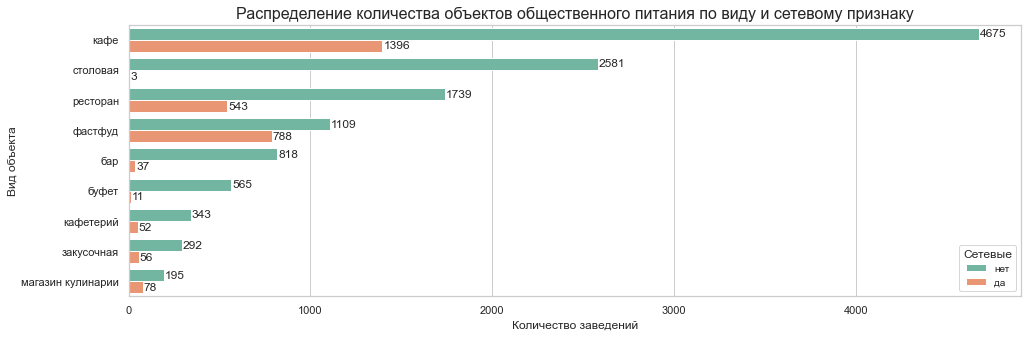

In [23]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='count', y='object_type', hue='chain', data=chain_objects_all, palette='Set2')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Вид объекта', fontsize=12)
plt.legend(title='Сетевые', fontsize=10, loc='lower right')
plt.title('Распределение количества объектов общественного питания по виду и сетевому признаку', fontsize=16)
plt.show()

In [24]:
ratio_chain_objects = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
ratio_chain_objects.columns = ['chain', 'not_chain']
ratio_chain_objects['ratio, %'] = round(ratio_chain_objects['chain'].div(ratio_chain_objects.sum(axis=1)) * 100, 2)
ratio_chain_objects.sort_values(by='ratio, %', ascending=False)

chain  not_chain  ratio, %
object_type                                  
фастфуд              788       1109     41.54
магазин кулинарии     78        195     28.57
ресторан             543       1739     23.79
кафе                1396       4675     22.99
закусочная            56        292     16.09
кафетерий             52        343     13.16
бар                   37        818      4.33
буфет                 11        565      1.91
столовая               3       2581      0.12

*`Подытожим:`*  
* *Для фастфуда наиболее характерно сетевое распространение (41.5% процента);*  
* *Удивительно, что на втором месте находятся магазины кулинарии с 28.6%, хотя их объем, как мы выяснили ранее, менее 2%;*  
* *Столовые - безусловные лидеры среди индивидуальных заведений, только 0.12% в сети.*

### 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Рассмотрим весь массив сетевых заведений в разрезе:

In [25]:
chain_objects_yes = (data[data['chain'].isin(['да'])]
                     .pivot_table(index='object_type', 
                                  values=['object_name', 'id', 'number'], 
                                  aggfunc={'object_name': 'nunique', 'id': 'count', 'number': 'mean'})
                     .round(2)
                     .sort_values(by='number', ascending=False)
                     .reset_index())
chain_objects_yes.rename(
    columns={'object_name': 'count_name_unique', 'id':'count_objects', 'number': 'mean_number'}, inplace=True)
chain_objects_yes

object_type  count_objects  mean_number  count_name_unique
0           столовая              3       112.33                  3
1           ресторан            543       100.36                205
2                бар             37        53.03                 31
3               кафе           1396        47.43                343
4            фастфуд            788        40.32                132
5         закусочная             56        14.38                 30
6              буфет             11        12.73                  7
7          кафетерий             52        12.27                 30
8  магазин кулинарии             78         8.68                 23

In [26]:
fig = px.scatter(chain_objects_yes, x='mean_number', y='count_name_unique',
                 color='object_type', size='mean_number')

fig.update_xaxes(title_text='Среднее кол-во посадочных мест')
fig.update_yaxes(title_text='Кол-во уникальных сетевых заведений')
fig.update_layout(title_text='Отношение количества уникальных сетевых объектов питания к среднему кол-ву посадочных мест', 
                  legend_title='Вид объекта')
fig.show()

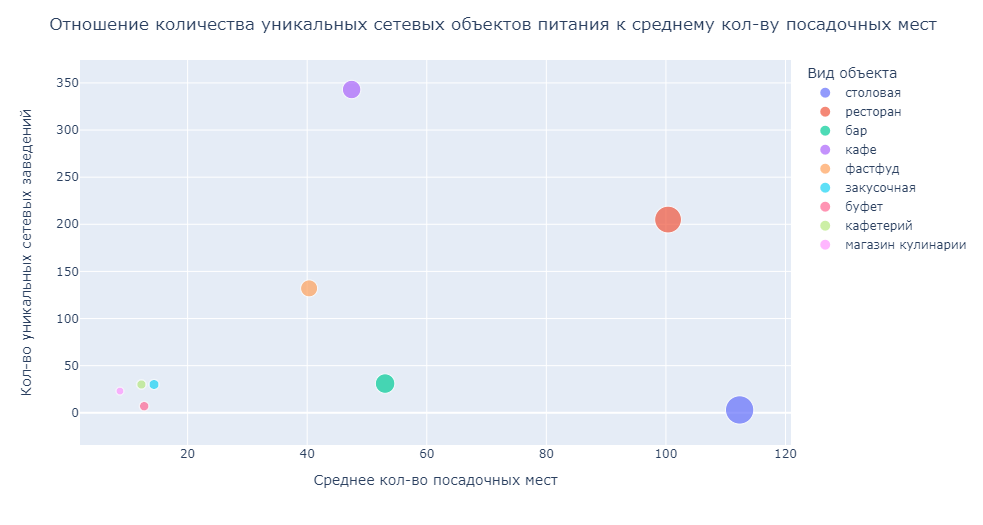

*Самым большим залом в 112 посадочных мест обладают сетевые столовые (под разными названиями, но, возможно, под одним владельцем). На втором месте с результатом в 100 мест идут рестораны. Замыкают список магазины кулинарии - логично, так как фокус данных заведений на формат "to go".*

И каждую сеть по отдельности:

In [27]:
chain_names_yes = (data[data['chain'].isin(['да'])]
                     .pivot_table(index='object_name', 
                                  values=['id', 'number'], 
                                  aggfunc={'id': 'count', 'number': 'mean'})
                     .round(2)
                     .sort_values(by='id', ascending=False)
                     .reset_index())
chain_names_yes.columns = ['object_name', 'count', 'mean_number']
chain_names_yes

object_name  count  mean_number
0                      шоколадница    157        57.18
1                              kfc    155        55.34
2                       макдоналдс    150        87.70
3                      бургер кинг    137        46.65
4                          теремок     94        25.61
..                             ...    ...          ...
572           кафе «хлеб насущный»      1        38.00
573  кафе «урюк» хивинская чайхона      1        50.00
574                 кафе «торнадо»      1        80.00
575                  кафе «тапчан»      1        70.00
576           кофе с собой gate 42      1         4.00

[577 rows x 3 columns]

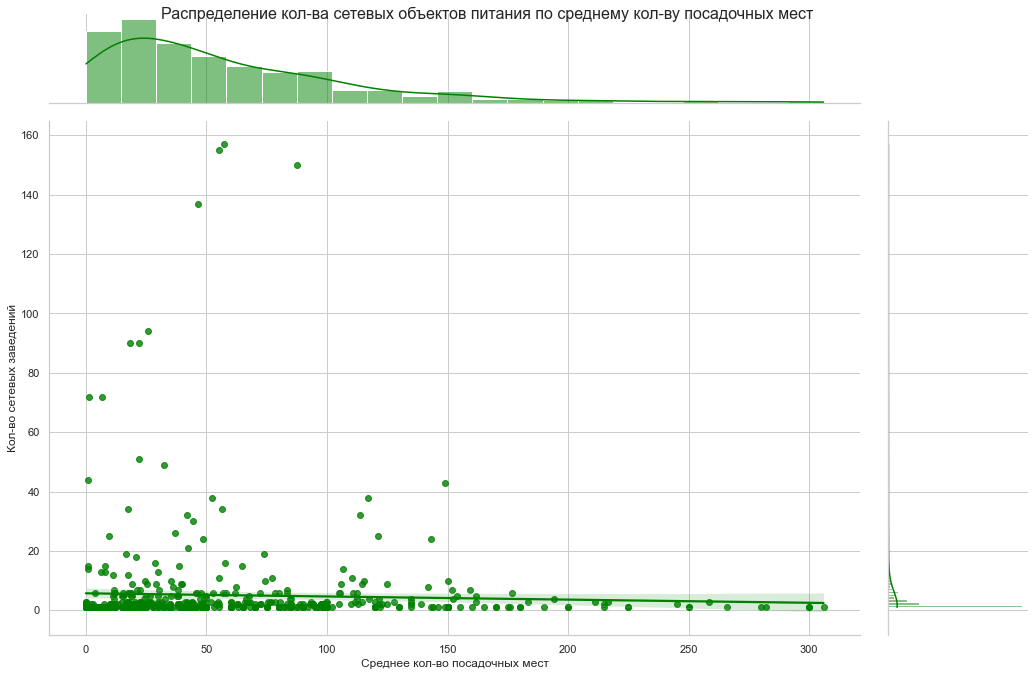

In [28]:
sns.set_theme(style='whitegrid')

ax = sns.jointplot(x='mean_number', y='count', data=chain_names_yes,
                   kind='reg', color='green')

ax.fig.set_figwidth(16)
ax.fig.set_figheight(10)
ax.ax_joint.set_xlabel('Среднее кол-во посадочных мест', fontsize=12)
ax.ax_joint.set_ylabel('Кол-во сетевых заведений', fontsize=12)
ax.fig.suptitle('Распределение кол-ва сетевых объектов питания по среднему кол-ву посадочных мест', fontsize=16)
plt.show()

In [29]:
data['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [30]:
print('Cреднее количество заведений в одной сети:', round(chain_names_yes['count'].mean()))
print('Cреднее количество посадочных мест в сетевом заведении:', round(chain_names_yes['mean_number'].mean()))

Cреднее количество заведений в одной сети: 5
Cреднее количество посадочных мест в сетевом заведении: 59


*`В результате:`*  
* *Большие посадочные площади (от 100 мест) характерны сетям с единичным или несколькими объектами (например, столовые или рестораны);*  
* *Крупные сетевики, как правило, представители сегмента фастфуд и кафе, используют планировку более рационально и укладываются в максимальные 80-90 посадочных мест;*   
* *Среднее типовое заведение сети вмещает 59 посадочных мест и входит в сеть из 5 штук.*

### 2.5. Какой вид предоставляет в среднем самое большое количество посадочных мест?

Сгруппируем датасет по виду объекта и сетевому признаку:

In [31]:
chain_names = (data.pivot_table(index=['object_type', 'chain'], 
                                  values=['id', 'number'], 
                                  aggfunc={'id': 'count', 'number': 'mean'})
                   .round(2)
                   .sort_values(by='number', ascending=False)
                   .reset_index())
chain_names.columns = ['object_type', 'chain', 'count', 'mean_number']
chain_names

object_type chain  count  mean_number
0            столовая   нет   2581       130.36
1            столовая    да      3       112.33
2            ресторан    да    543       100.36
3            ресторан   нет   1739        95.80
4                 бар    да     37        53.03
5               буфет   нет    565        52.18
6                кафе    да   1396        47.43
7                 бар   нет    818        43.10
8             фастфуд    да    788        40.32
9                кафе   нет   4675        37.50
10         закусочная    да     56        14.38
11              буфет    да     11        12.73
12          кафетерий    да     52        12.27
13          кафетерий   нет    343         8.72
14  магазин кулинарии    да     78         8.68
15            фастфуд   нет   1109         6.94
16         закусочная   нет    292         6.60
17  магазин кулинарии   нет    195         4.35

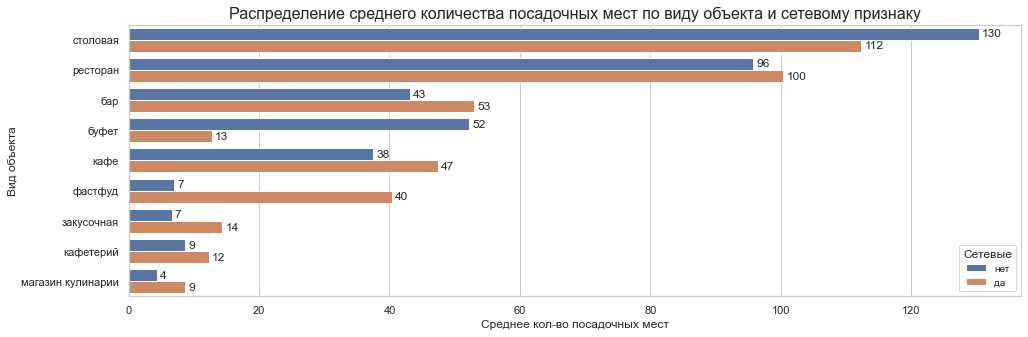

In [32]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='mean_number', y='object_type', hue='chain', data=chain_names)

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Среднее кол-во посадочных мест', fontsize=12)
plt.ylabel('Вид объекта', fontsize=12)
plt.legend(title='Сетевые', fontsize=10, loc='lower right')
plt.title('Распределение среднего количества посадочных мест по виду объекта и сетевому признаку', fontsize=16)
plt.show()

И только по виду по средним значениям:

In [33]:
chain_names_all = (data.pivot_table(index='object_type', 
                                  values=['id', 'number'], 
                                  aggfunc={'id': 'count', 'number': 'mean'})
                   .round(2)
                   .sort_values(by='number', ascending=False)
                   .reset_index())
chain_names_all.columns = ['object_type', 'count', 'mean_number']
chain_names_all

object_type  count  mean_number
0           столовая   2584       130.34
1           ресторан   2282        96.88
2              буфет    576        51.43
3                бар    855        43.53
4               кафе   6071        39.79
5            фастфуд   1897        20.81
6          кафетерий    395         9.18
7         закусочная    348         7.85
8  магазин кулинарии    273         5.59

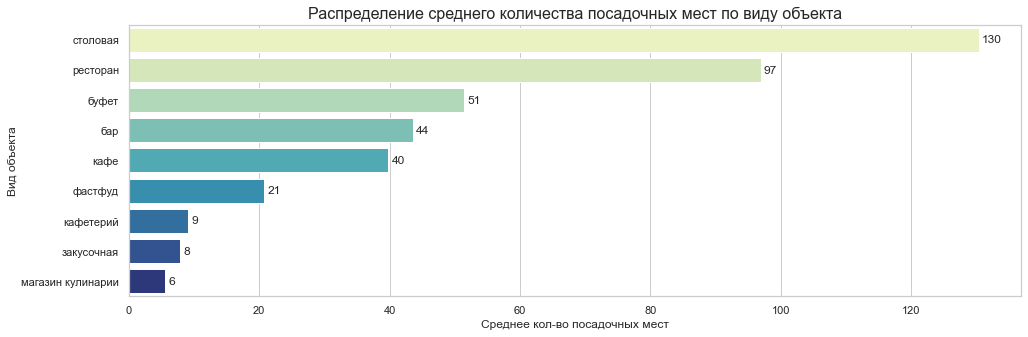

In [34]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='mean_number', y='object_type', data=chain_names_all, palette='YlGnBu')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Среднее кол-во посадочных мест', fontsize=12)
plt.ylabel('Вид объекта', fontsize=12)
plt.title('Распределение среднего количества посадочных мест по виду объекта', fontsize=16)
plt.show()

А также по медианным показателям:

In [35]:
chain_names_all_m = (data.pivot_table(index='object_type', 
                                  values=['id', 'number'], 
                                  aggfunc={'id': 'count', 'number': 'median'})
                   .sort_values(by='number', ascending=False)
                   .reset_index())
chain_names_all_m.columns = ['object_type', 'count', 'median_number']
chain_names_all_m

object_type  count  median_number
0           столовая   2584            103
1           ресторан   2282             80
2                бар    855             35
3              буфет    576             32
4               кафе   6071             30
5          кафетерий    395              6
6            фастфуд   1897              6
7         закусочная    348              0
8  магазин кулинарии    273              0

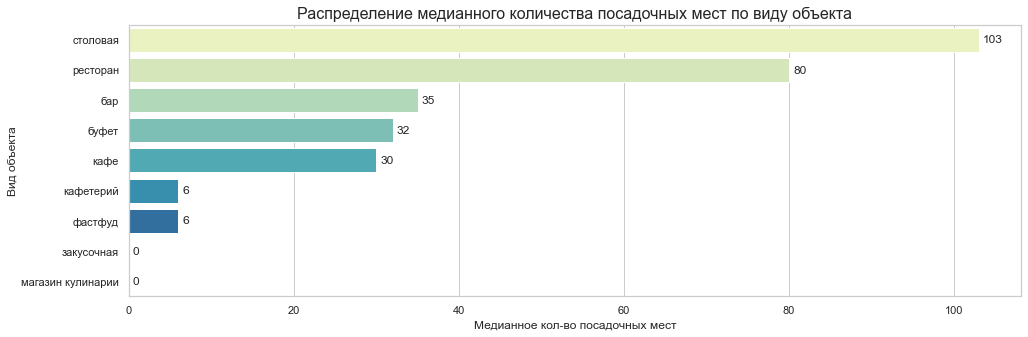

In [36]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='median_number', y='object_type', data=chain_names_all_m, palette='YlGnBu')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Медианное кол-во посадочных мест', fontsize=12)
plt.ylabel('Вид объекта', fontsize=12)
plt.title('Распределение медианного количества посадочных мест по виду объекта', fontsize=16)
plt.show()

*`На основании двух графиков со средними значениями:`*  
* *Столовые лидируют по количеству посадочных мест (130 шт.) в командном зачете, причем несетевые столовые больше вмещают посетителей;*  
* *Рестораны сохраняют второе место с показателем в 97 мест;*   
* *Магазины кулинарии, закусочные и кафетерии, обладают самым малым залом (меньше 10 мест, что характерно по их профилю).*  

*`И по графику с медианными значениями:`*  
* *Столовые и рестораны сохраняют свою позицию в рейтинге, однако медианные значения (устойчивые к выбросам) всех анализируемых объектов ниже средних на 25%;*  
* *А у закусочных и магазинов кулинарии стали отсутствуют посадочные места вообще.*

### 2.6. Выделение улицы заведения с помощью создания отдельного столбца

Используем регулярные выражения, позволяющие "извлечь" основные типы улиц Москвы:

In [37]:
words = ['улица','ул.','переулок','пер.', 'шоссе', 'ш.', 'проспект', 'пр-т', 'пр.', 'площадь', 'пл.', 'проезд','прзд.',
         'аллея', 'ал.', 'бульвар', 'б-р', 'набережная', 'наб.', 'тупик', 'туп.', 'линия', 'лн.', 'микрорайон','мкр.',
         'мкрн.', 'мкад','московской кольцевой автодороги', 'набережная','наб.', 'территория', 'тер.', 'квартал', 
         'кв-л.', 'парк', 'мост']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
data['street'] = data['address'].str.extract(str_pat, flags=re.I)

In [38]:
data[data['street'].isna()]

id               object_name chain object_type  \
859     23601     буфет - гбоу сош № 64   нет       буфет   
860     23604           буфет - гбоу 60   нет       буфет   
1405    20199                       это   нет        кафе   
1406    68113                    френдс   нет        кафе   
1407    20105  кафе «граф монте-кристо»   нет        кафе   
...       ...                       ...   ...         ...   
14981  216909                      кафе   нет       буфет   
14997  216942          шашлычный дворик   нет        кафе   
14998  216926              кафе «сахли»   нет  закусочная   
15015  208239              газпромнефть   нет        кафе   
15184  220587               пицца паоло    да   кафетерий   

                                                                   address  \
859                                             партизанская улица, дом 30   
860                                             партизанская улица, дом 30   
1405                            город москва, город зеленоград, корпус 401   
1406                            город москва, город зеленоград, корпус 435   
1407                            город москва, город зеленоград, корпус 436   
...                                                                    ...   
14981       город москва, поселение десеновское, деревня ватутинки, дом 34   
14997  город москва, поселение десеновское, деревня ватутинки, владение 10   
14998  город москва, поселение десеновское, деревня ватутинки, владение 15   
15015                  поселение "мосрентген", деревня дудкино, владение 1   
15184                          город москва, город зеленоград, корпус 1627   

       number street  
859       100    NaN  
860       100    NaN  
1405       35    NaN  
1406       34    NaN  
1407       40    NaN  
...       ...    ...  
14981      10    NaN  
14997      15    NaN  
14998      10    NaN  
15015      20    NaN  
15184       0    NaN  

[317 rows x 7 columns]

In [39]:
print('Количество пропущенных значений в колонке "street" после очистки:', data['street'].isna().sum())
print('Доля пропущенных значений от всего датафрейма: {:.2%}'.format(data['street'].isna().sum() / len(data)))

Количество пропущенных значений в колонке "street" после очистки: 317
Доля пропущенных значений от всего датафрейма: 2.07%


Посмотрим на адреса, невошедшие в наш перечень, по популярности:

In [40]:
data[data['street'].isna()]['address'].value_counts().head(10)

город москва, поселение московский, деревня говорово, дом 1б/н                    7
город москва, поселение московский, деревня саларьево, владение 3, строение 1     5
город москва, поселение воскресенское, посёлок воскресенское, дом 40, корпус 2    4
город москва, город зеленоград, корпус 317а, строение 1                           4
город москва, поселение московский, деревня лапшинка, владение 8, корпус 1        3
улица льва толстого, дом 18                                                       3
город москва, город зеленоград, корпус 124, строение 1                            3
николоямская улица, дом 28/60, строение 1                                         3
город москва, город зеленоград, корпус 2309а                                      3
город москва, город зеленоград, корпус 1805                                       3
Name: address, dtype: int64

*`Вывод:`*  
* *По результату формирования столбца "street" датафрейм заполнился 2% пропусков. Причина: фильтрация адресов по типам улиц, отсекая обособленные населенные пункты Москвы (город Зеленоград, поселения и т.д.);*  
* *Для наглядности понимания проведенного среза составлен ТОП-10 адресов, непопавших в фильтр. На первом месте "город Москва, поселение Московский, деревня Говорово, дом 1б/н", где по данному адресу расположено/зарегистрировано 7 точек общественного питания.*

### 2.7. ТОП-10 улиц по количеству объектов общественного питания

In [41]:
top_10 = data.groupby('street').agg({'id': 'count'}).sort_values(by='id', ascending=False).reset_index().head(10)
top_10.columns = ['street', 'count']
top_10

street  count
0           проспект мира    203
1       профсоюзная улица    181
2  ленинградский проспект    170
3  пресненская набережная    167
4        варшавское шоссе    164
5      ленинский проспект    147
6    проспект вернадского    128
7    кутузовский проспект    114
8         каширское шоссе    111
9    кировоградская улица    108

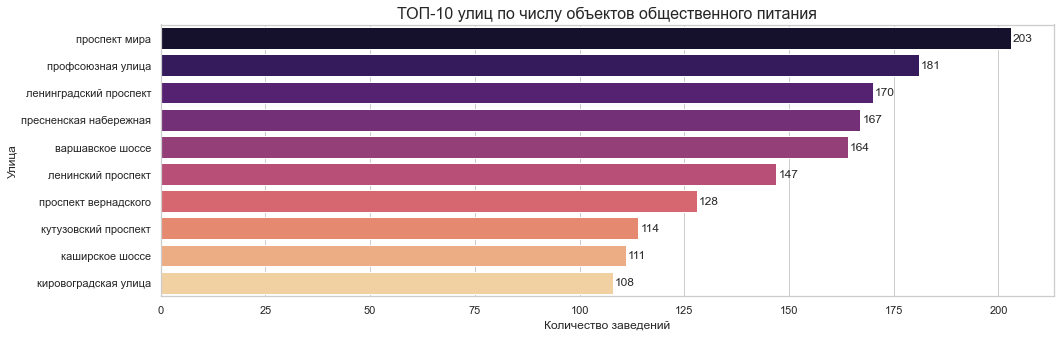

In [42]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='count', y='street', data=top_10, palette='magma')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Улица', fontsize=12)
plt.title('ТОП-10 улиц по числу объектов общественного питания', fontsize=16)
plt.show()

In [43]:
print('Доля кол-ва заведений ТОП-10 от всего рынка Москвы: {:.2%}'.format(top_10['count'].sum() / len(data)))

Доля кол-ва заведений ТОП-10 от всего рынка Москвы: 9.77%


*`Проспект Мира занимает лидирующее место по популярности (203 объекта), Кировогорадская улица с результатом в 108 заведений на 10 месте в нашем ТОП-10. 
ТОП-10 охватывает порядка 9.8% от всего рынка общественного питания Москвы.`*

Отобразим объекты общественного питания ТОП-10 улиц на карте Москвы:

In [44]:
moscow_map = folium.Map(
    location = [55.72, 37.6156],
    zoom_start = 11
)

folium.Marker(
    [55.781,37.632], popup='проспект Мира').add_to(moscow_map)
folium.Marker(
    [55.656,37.540], popup='Профсоюзная улица').add_to(moscow_map)
folium.Marker(
    [55.779,37.580], popup='Ленинградский проспект').add_to(moscow_map)
folium.Marker(
    [55.746861,37.54139], popup='Пресненская набережная').add_to(moscow_map)
folium.Marker(
    [55.703,37.622], popup='Варшавское шоссе').add_to(moscow_map)
folium.Marker(
    [55.708,37.587], popup='Ленинский проспект').add_to(moscow_map)
folium.Marker(
    [55.693,37.536], popup='проспект Вернадского').add_to(moscow_map)
folium.Marker(
    [55.737,37.523], popup='Кутузовский проспект').add_to(moscow_map)
folium.Marker(
    [55.675,37.626], popup='Каширское шоссе').add_to(moscow_map)
folium.Marker(
    [55.614449,37.605023], popup='Кировоградская улица').add_to(moscow_map)

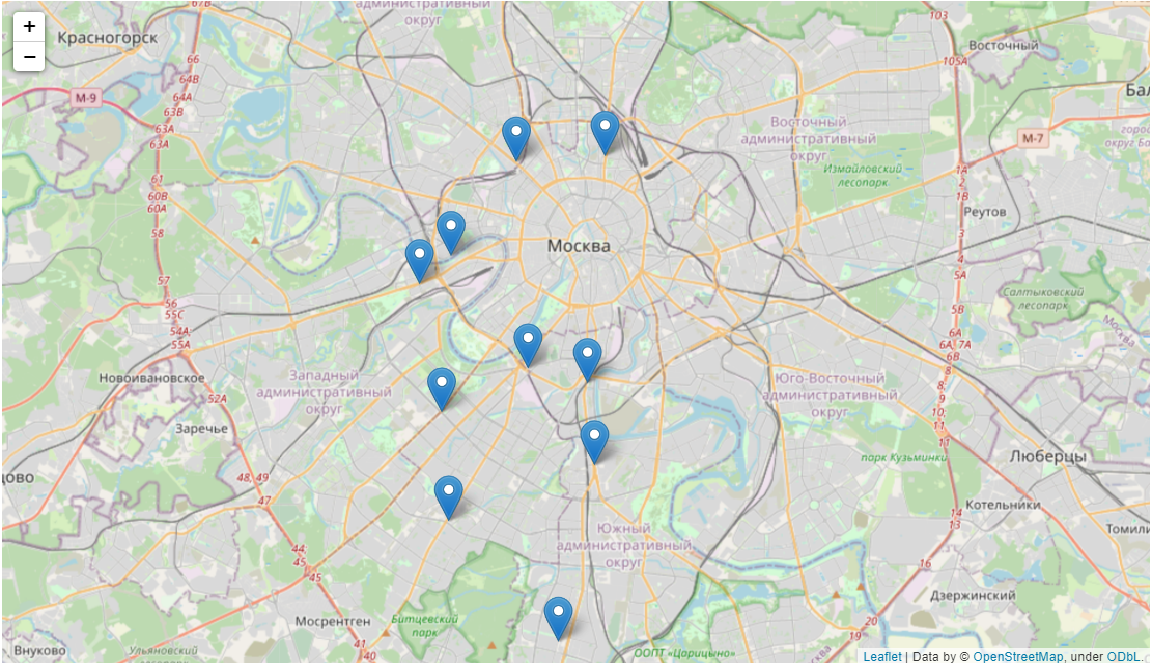

Воспользуемся внешней информацией для привязки каждой выделенной улицы Москвы к району и округу, загрузим данные:

In [45]:
url = 'https://docs.google.com/spreadsheets/d/13reHjMvvz110Jtjha1BHzgLD6cjGe6ZUr6Fn6z9N05E/edit?usp=sharing'

id = url.split('/')[5]
df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')

df.head()

ID  \
0        Код   
1   00151635   
2  000077874   
3  000024309   
4  000027429   

                                                                                 Name  \
0                                                                        Наименование   
1                                                                             СМЕТАНА   
2                                                                              Родник   
3                                                                     Кафе «Академия»   
4  ГБОУ «Школа № 1430 имени Героя Социалистического Труда Г.В. Кисунько» Школа № 1051   

   global_id       IsNetObject               OperatingCompany   TypeObject  \
0  global_id  Является сетевым  Название управляющей компании  Вид объекта   
1  637376221               нет                            NaN         кафе   
2  637376331               нет                            NaN         кафе   
3  637376349               нет                            NaN     ресторан   
4  637376480               нет                            NaN     столовая   

                                   AdmArea           District  \
0         Административный округ по адресу              Район   
1  Северо-Восточный административный округ  Ярославский район   
2       Центральный административный округ    Таганский район   
3       Центральный административный округ    Таганский район   
4  Северо-Восточный административный округ    район Лианозово   

                                                                                                                     Address  \
0                                                                                                                      Адрес   
1                                                                                 город Москва, улица Егора Абакумова, дом 9   
2                                                                          город Москва, улица Талалихина, дом 2/1, корпус 1   
3  Российская Федерация, город Москва, внутригородская территория муниципальный округ Таганский, Абельмановская улица, дом 6   
4                                                                                      город Москва, Угличская улица, дом 17   

                       PublicPhone             SeatsCount  \
0               Контактный телефон  Число посадочных мест   
1  PublicPhone:(499) 183-14-10\n\n                     48   
2  PublicPhone:(495) 676-55-35\n\n                     35   
3  PublicPhone:(495) 662-30-10\n\n                     95   
4  PublicPhone:(499) 908-06-15\n\n                    240   

              SocialPrivileges      Longitude_WGS84       Latitude_WGS84  \
0  Показатель социальных льгот     Долгота в WGS-84      Широта в WGS-84   
1                          нет  37.7145650004360390  55.8790015313033730   
2                          нет  37.6733061300344000  55.7382386551547000   
3                          нет  37.6696475969381000  55.7355114718314000   
4                          нет  37.5669400000000020  55.9040188006692200   

   geodata_center  geoarea  
0  geodata_center  geoarea  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN

Приведем полученные данные к нижнему регистру:

In [46]:
for column in df.columns:
    try:
        df[column] = df[column].str.lower()
    except:
        continue

df.columns = df.columns.str.lower()
df.drop(index=0, inplace=True)
df.head()

id  \
1   00151635   
2  000077874   
3  000024309   
4  000027429   
5   00148815   

                                                                                 name  \
1                                                                             сметана   
2                                                                              родник   
3                                                                     кафе «академия»   
4  гбоу «школа № 1430 имени героя социалистического труда г.в. кисунько» школа № 1051   
5                                                                            брусника   

   global_id isnetobject operatingcompany typeobject  \
1  637376221         нет              NaN       кафе   
2  637376331         нет              NaN       кафе   
3  637376349         нет              NaN   ресторан   
4  637376480         нет              NaN   столовая   
5  637376481          да         брусника       кафе   

                                   admarea           district  \
1  северо-восточный административный округ  ярославский район   
2       центральный административный округ    таганский район   
3       центральный административный округ    таганский район   
4  северо-восточный административный округ    район лианозово   
5       центральный административный округ        район арбат   

                                                                                                                     address  \
1                                                                                 город москва, улица егора абакумова, дом 9   
2                                                                          город москва, улица талалихина, дом 2/1, корпус 1   
3  российская федерация, город москва, внутригородская территория муниципальный округ таганский, абельмановская улица, дом 6   
4                                                                                      город москва, угличская улица, дом 17   
5                                                                              город москва, переулок сивцев вражек, дом 6/2   

                       publicphone seatscount socialprivileges  \
1  publicphone:(499) 183-14-10\n\n         48              нет   
2  publicphone:(495) 676-55-35\n\n         35              нет   
3  publicphone:(495) 662-30-10\n\n         95              нет   
4  publicphone:(499) 908-06-15\n\n        240              нет   
5  publicphone:(495) 697-04-89\n\n         10              нет   

       longitude_wgs84       latitude_wgs84 geodata_center geoarea  
1  37.7145650004360390  55.8790015313033730            NaN     NaN  
2  37.6733061300344000  55.7382386551547000            NaN     NaN  
3  37.6696475969381000  55.7355114718314000            NaN     NaN  
4  37.5669400000000020  55.9040188006692200            NaN     NaN  
5  37.5981275484399900  55.7473904905259940            NaN     NaN

Еще раз посмотрим на исходный датафрейм до объединения с внешним источником:

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
 6   street       14964 non-null  object
dtypes: int64(2), object(5)
memory usage: 955.1+ KB


И проведем их слияние:

In [48]:
data = data.merge(df[['address', 'district', 'admarea']], on='address', how='left')
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number', 'street'])
data

id             object_name chain object_type  \
0      151635                 сметана   нет        кафе   
1       77874                  родник   нет        кафе   
2       24309         кафе «академия»   нет        кафе   
3       21894              пиццетория    да        кафе   
5      119365  кафе «вишневая метель»   нет        кафе   
...       ...                     ...   ...         ...   
69021  208537             шоколадница    да        кафе   
69026  209264             шоколадница    да        кафе   
69043  209186             шоколадница    да        кафе   
69060  221900             шоколадница    да        кафе   
69071  222535             шоколадница    да        кафе   

                                                                                             address  \
0                                                         город москва, улица егора абакумова, дом 9   
1                                                  город москва, улица талалихина, дом 2/1, корпус 1   
2                                                          город москва, абельмановская улица, дом 6   
3                                                            город москва, абрамцевская улица, дом 1   
5                                                  город москва, абрамцевская улица, дом 9, корпус 1   
...                                                                                              ...   
69021                                                   город москва, 3-й крутицкий переулок, дом 18   
69026                                                       город москва, улица земляной вал, дом 33   
69043                                                       город москва, улица земляной вал, дом 33   
69060  город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1   
69071                                                         город москва, ходынский бульвар, дом 4   

       number                  street              district  \
0          48   улица егора абакумова     ярославский район   
1          35        улица талалихина       таганский район   
2          95    абельмановская улица                   NaN   
3          40      абрамцевская улица       район лианозово   
5          50      абрамцевская улица                   NaN   
...       ...                     ...                   ...   
69021      50  3-й крутицкий переулок       таганский район   
69026      10      улица земляной вал       басманный район   
69043      20      улица земляной вал       басманный район   
69060      36          киевское шоссе  поселение московский   
69071      10       ходынский бульвар     хорошёвский район   

                                       admarea  
0      северо-восточный административный округ  
1           центральный административный округ  
2                                          NaN  
3      северо-восточный административный округ  
5                                          NaN  
...                                        ...  
69021       центральный административный округ  
69026       центральный административный округ  
69043       центральный административный округ  
69060    новомосковский административный округ  
69071          северный административный округ  

[15281 rows x 9 columns]

Для понимания, в каком районе и округе расположены ТОП-10 улиц, выведем их отдельным списком:

In [49]:
top_10_list = top_10["street"].tolist()
top_10_list

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

Теперь дополним таблицу ТОП-10 улиц разбивкой по районам, округам и количеству заведений в них:

In [50]:
top_10_total = data.query('street in @top_10_list').groupby(['street', 'district', 'admarea']).agg({'id': 'count'})
top_10_total.rename(columns={'id': 'count'}, inplace=True)
display(top_10_total)
top_10_total = top_10_total.reset_index()

count
street                 district                        admarea                                       
варшавское шоссе       донской район                   южный административный округ                31
                       нагорный район                  южный административный округ                25
                       поселение щербинка              новомосковский административный округ        1
                       район нагатино-садовники        южный административный округ                 4
                       район чертаново северное        южный административный округ                19
                       район чертаново центральное     южный административный округ                 8
                       район чертаново южное           южный административный округ                35
                       район южное бутово              юго-западный административный округ          2
каширское шоссе        район москворечье-сабурово      южный административный округ                29
                       район нагатино-садовники        южный административный округ                20
                       район орехово-борисово северное южный административный округ                10
                       район орехово-борисово южное    южный административный округ                 4
кировоградская улица   район чертаново северное        южный административный округ                19
                       район чертаново центральное     южный административный округ                76
                       район чертаново южное           южный административный округ                 7
кутузовский проспект   поселение краснопахорское       троицкий административный округ             40
                       район дорогомилово              западный административный округ             39
                       район фили-давыдково            западный административный округ             12
ленинградский проспект район аэропорт                  северный административный округ             61
                       район беговой                   северный административный округ             46
                       район сокол                     северный административный округ             20
                       хорошёвский район               северный административный округ             12
ленинский проспект     гагаринский район               юго-западный административный округ         31
                       донской район                   южный административный округ                10
                       ломоносовский район             юго-западный административный округ         10
                       обручевский район               юго-западный административный округ         30
                       район проспект вернадского      западный административный округ              1
                       район тропарёво-никулино        западный административный округ             20
                       район тёплый стан               юго-западный административный округ          3
                       район якиманка                  центральный административный округ          12
пресненская набережная пресненский район               центральный административный округ         135
проспект вернадского   ломоносовский район             юго-западный административный округ         13
                       поселение вороновское           троицкий административный округ              1
                       район проспект вернадского      западный административный округ             11
                       район раменки                   западный административный округ             32
                       район тропарёво-никулино        западный административный округ             46
проспект мира          алексеевский район              северо-восточный административный округ     42
                       мещанский район                 центральный административный округ          53
                

Сформируем отдельно таблицу по районам:

In [51]:
top_district = (top_10_total.pivot_table(index='district', values='count', aggfunc='sum')
                .sort_values(by='count', ascending=False)
                .reset_index())
top_district

district  count
0                 пресненский район    135
1       район чертаново центральное     84
2          район тропарёво-никулино     66
3                    район свиблово     62
4                    район аэропорт     61
5                 обручевский район     60
6                   мещанский район     53
7                     район беговой     46
8             район чертаново южное     42
9                алексеевский район     42
10                    донской район     41
11        поселение краснопахорское     40
12                район тёплый стан     39
13               район дорогомилово     39
14         район чертаново северное     38
15                  район черёмушки     34
16                    район раменки     32
17                гагаринский район     31
18       район москворечье-сабурово     29
19                   район коньково     29
20                   нагорный район     25
21         район нагатино-садовники     24
22              ломоносовский район     23
23                      район сокол     20
24                    район ясенево     14
25             район фили-давыдково     12
26                   район якиманка     12
27                хорошёвский район     12
28       район проспект вернадского     12
29               останкинский район     12
30  район орехово-борисово северное     10
31                  район ростокино      6
32     район орехово-борисово южное      4
33               район южное бутово      2
34               поселение щербинка      1
35            поселение вороновское      1

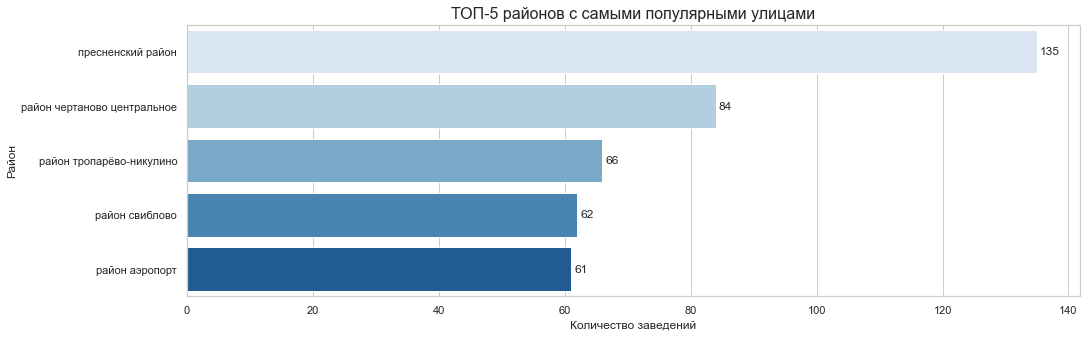

In [52]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='count', y='district', data=top_district.head(), palette='Blues')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Район', fontsize=12)
plt.title('ТОП-5 районов c самыми популярными улицами', fontsize=16)
plt.show()

*`В ТОП популярности стремительно вырвался Пресненский район с Пресненской набережной, Чертаново Центральное с Кировоградской улице расположен на втором месте.`*

И по округам:

In [53]:
top_admarea = (top_10_total.pivot_table(index='admarea', values='count', aggfunc='sum')
                .sort_values(by='count', ascending=False)
                .reset_index())
top_admarea

admarea  count
0             южный административный округ    297
1      юго-западный административный округ    232
2       центральный административный округ    200
3          западный административный округ    161
4          северный административный округ    139
5  северо-восточный административный округ    122
6          троицкий административный округ     41
7    новомосковский административный округ      1

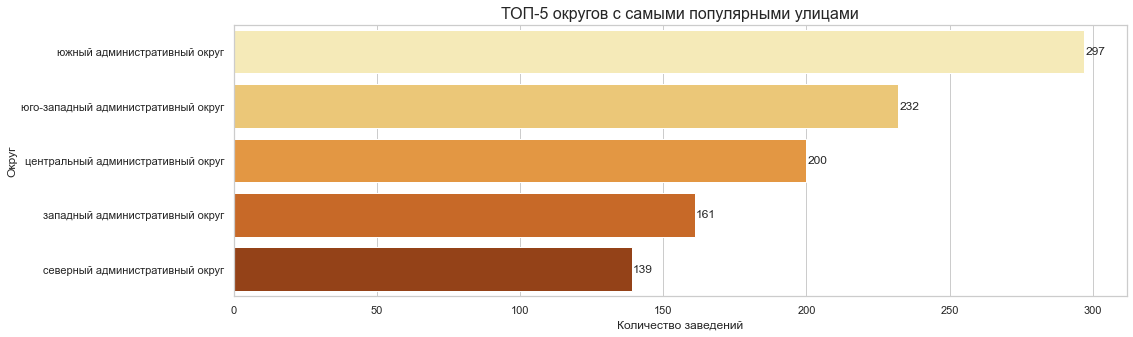

In [54]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='count', y='admarea', data=top_admarea.head(), palette='YlOrBr')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.5, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Округ', fontsize=12)
plt.title('ТОП-5 округов c самыми популярными улицами', fontsize=16)
plt.show()

*`По округам самый высококонкурентный Южный административный округ (районы Чертаново Центральное и пр.), далее идет Юго-Западный административный округ. Центральный административный округ с Пресненской набережной (Пресненский район) отошел на третий план.`*

### 2.8. В каких районах расположены улицы с одним объектом общественного питания?

In [55]:
outsiders = (data.pivot_table(index=['street', 'district', 'admarea'], values='id', aggfunc='count')
             .sort_values(by='street')
             .reset_index())
outsiders.rename(columns={'id': 'count'}, inplace=True)
outsiders = outsiders[outsiders['count'] == 1]
outsiders

street                district  \
1         1-й балтийский переулок          район аэропорт   
2          1-й басманный переулок    красносельский район   
3         1-й ботанический проезд          район свиблово   
7       1-й голутвинский переулок          район якиманка   
10    1-й котельнический переулок         таганский район   
...                           ...                     ...   
1846              юбилейная улица        поселение троицк   
1854          якиманский переулок          район якиманка   
1856              янтарный проезд  лосиноостровский район   
1860               ясеневая улица     поселение сосенское   
1865              яузский бульвар         таганский район   

                                      admarea  count  
1             северный административный округ      1  
2          центральный административный округ      1  
3     северо-восточный административный округ      1  
7          центральный административный округ      1  
10         центральный административный округ      1  
...                                       ...    ...  
1846          троицкий административный округ      1  
1854       центральный административный округ      1  
1856  северо-восточный административный округ      1  
1860    новомосковский административный округ      1  
1865       центральный административный округ      1  

[632 rows x 4 columns]

In [56]:
print('Количество улиц с одним объектом общественного питания:', len(outsiders['street'].unique()))

Количество улиц с одним объектом общественного питания: 611


Отдельно рассмотрим районы:

In [57]:
outsiders_district = (outsiders.pivot_table(index='district', values='street', aggfunc='count')
             .sort_values(by='street', ascending=False)
             .reset_index())
outsiders_district.rename(columns={'street': 'street_count'}, inplace=True)
outsiders_district

district  street_count
0          басманный район            27
1          район хамовники            25
2          таганский район            25
3        пресненский район            20
4           тверской район            19
..                     ...           ...
125    поселение роговское             1
126           район силино             1
127         район северный             1
128  район северное тушино             1
129          район коптево             1

[130 rows x 2 columns]

In [58]:
print('Количество районов, в которых есть улицы с одним объектом общественного питания:', 
      len(outsiders_district['district'].unique()))

Количество районов, в которых есть улицы с одним объектом общественного питания: 130


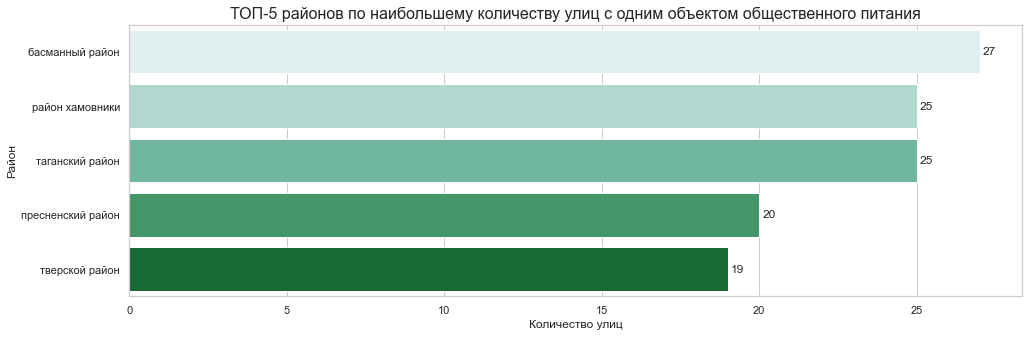

In [59]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='street_count', y='district', data=outsiders_district.head(), palette='BuGn')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.1, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Количество улиц', fontsize=12)
plt.ylabel('Район', fontsize=12)
plt.title('ТОП-5 районов по наибольшему количеству улиц с одним объектом общественного питания', fontsize=16)
plt.show()

*`Районов Москвы, где есть улицы с одной точкой общественного питания, очень много - их 130 штук. Лидириуют в порядке убывания: Басманный район с 27 улицами, Хамовники и Таганский район по 25 улиц в каждом.  
Всего же в 130 районах расположены 632 улицы с одним заведением, что составляет порядка 30% от всего количества улиц Москвы.`*

А также округа:

In [60]:
outsiders_admarea = (outsiders.pivot_table(index='admarea', values='street', aggfunc='count')
             .sort_values(by='street', ascending=False)
             .reset_index())
outsiders_admarea.rename(columns={'street': 'street_count'}, inplace=True)
outsiders_admarea

admarea  street_count
0        центральный административный округ           164
1          восточный административный округ            71
2   северо-восточный административный округ            67
3           западный административный округ            61
4           северный административный округ            59
5      юго-восточный административный округ            57
6       юго-западный административный округ            42
7    северо-западный административный округ            36
8              южный административный округ            31
9     новомосковский административный округ            20
10          троицкий административный округ            16
11    зеленоградский административный округ             8

In [61]:
print('Количество округов, в которых есть улицы с одним объектом общественного питания:', 
      len(outsiders_admarea['admarea'].unique()))

Количество округов, в которых есть улицы с одним объектом общественного питания: 12


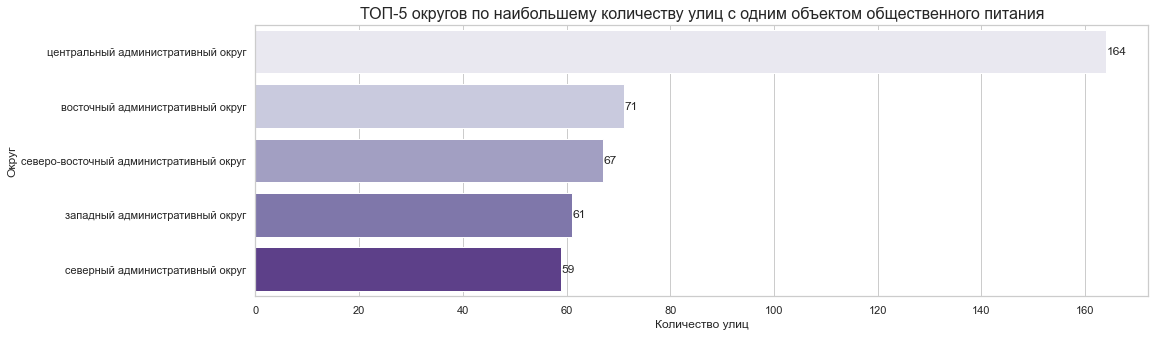

In [62]:
plt.figure(figsize=(16,5))
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='street_count', y='admarea', data=outsiders_admarea.head(), palette='Purples')

for p in ax.patches: 
    height=p.get_height() 
    width=p.get_width() 
    ax.text(x=width+0.1, y=p.get_y()+(height/2), s='{:.0f}'.format(width), va='center')

plt.xlabel('Количество улиц', fontsize=12)
plt.ylabel('Округ', fontsize=12)
plt.title('ТОП-5 округов по наибольшему количеству улиц с одним объектом общественного питания', fontsize=16)
plt.show()

*`Центральный административный округ на безоговорочном первом месте (164 улицы с одним заведением), последующие округа не набрали и половины его объема значений.`*

## 3. Общий вывод

В процессе анализа открытых данных рынка общественного питания в Москвы, мной было принято решение подключить файл из внешнего общедоступного источника - с сайта https://data.mos.ru. Это было необходимо, так как первичные данные имели неполную информацию и дубликаты.

Это позволило более полно оценить инвестиционную привлекательность районов и улиц Москвы и с уверенностью предоставить свои выводы и заключения, а также составить краткую **[презентацию](https://drive.google.com/file/d/1EDV4jUZrPoO96roJVjVO1IsxfSyPwjhO/view?usp=sharing)** по результату.


Кратко хочу выделить следующие заключения из моего проекта для Вашего понимания рынка общественного питания Москвы:
* Кафе - самая популярная точка питания, ее доля составляет 39.7% рынка или 6071 объект в абсолютных величинах. Доля остальных видов не превышает 17%, что говорит в пользу кафе; 
* НЕсетевых точек значительно больше, их 80.6%. Это плюс для открытия нового бизнеса, так как, как правило, именно сетевые точки составляют основную конкуренцию и являются высоким риском для будущих инвесторов в любом секторе экономики;
* Тем более, если смотреть на разрез "сетевиков", именно для фастфуда это наиболее характерно - 41.5% из них в сети. Доля же кафе и ресторанов не превышет 24% в каждом;
* Посадочные площади от 100 мест характерны столовым и ресторанам, в сетевых кафе и фастфудах количество мест не превышает 47;
* На вместимость зала прямо влияет сетевой признак, несетевые заведения более рациональны. Например, у "независимого" кафе в среднем 38 посадочных мест;
* В ТОП-3 самых проходимых улиц (внутри мкада Москвы) по количеству точек общественного питания на них вошли: Проспект Мира с показателем в 203 заведения, Профсоюзная улица и Ленинградский проспект с 181 и 170 объектами соответственно. Для наглядности мною составлена интерактивная карта Москвы, с нанесенными на нее ТОП-10 улиц;
* В ТОП-3 самых многочисленных районов (внутри мкада Москвы) по количеству заведений в них: Пресненский район с Пресненской набережной - 135 заведений, Чертаново Центральное с Кировоградской улице - 84 точки питания и Тропарево-Никулино с 66 объектами;
* Басманный район, Хамовники и Таганский район менее конкурентны для нового бизнеса, в них расположено больше всего улиц с одним объектом. Желательно до момента принятия окончательного решения предварительно посмотреть их проходимость.

**`По итогу вышесказанного хочу дать свои рекомендации по новому заведению:`**
* Формат кафе, который я изначально предлагал Вам для рассмотрения, наиболее выигрышен с точки зрения как популярного сегмента общественных заведений, так и по оптимальным инвестиционным затратам (небольшое помещение снизит стартовые расходы на открытие, а вложения, в свою очередь, имеют низкий риск окупаемости из-за популярности данного формата заведений);
* Моя идея предоставления сервиса клиентам роботами-официантами оригинальна и нова рынку общественного питания, не потребует выплаты зарплат и соц. отчислений с момента их внедрения. С учетом начала всеобъемлющего развития рынка "Digital" у нас есть значительное преимущество;
* Для понимания, где именно расположить первое кафе, хочу обратить Ваше внимание на центральные районы Москвы - Басманный, Хамовники и Таганский. Особенно, если расположить кафе в наиболее людных местах - фудмолах или на перекрестках самых проходимых улиц. Можно предварительно посмотреть их совместно более детально;
* Около 40 посадочных мест будет достаточно. Напомню, это средний показатель для кафе на рынке общественного питания Москвы;
* А по результатам экономических показаталей первого кафе имеет смысл расширить данную малоконкурентную нишу на рынке, открыв небольшую сеть из двух-трех штук. Не обязательно только в Москве, имеет смысл проанализировать рынок городов-миллионников. К этому моменту требуется собрать новые актуальные сведения и, желательно, дополнительно проанализировать проходимость и наличие конкурентов вокруг. К кому обратиться, Вы уже знаете.